In [1]:
# using Pkg
# Pkg.add(url="https://github.com/MasanoriKanamaru/Astroshaper")
# Pkg.update("Astroshaper")

In [2]:
# Pkg.test("Astroshaper")

In [3]:
# using Plots
# using FileIO
# using JLD2
# using Profile

In [3]:
using Revise
using Astroshaper

In [4]:
shapedir = "/Users/masanorikanamaru/Documents/shape/ryugu"

shapename = "ryugu_v252_f500.obj"
# shapename = "ryugu_v752_f1500.obj"
# shapename = "ryugu_test.obj"

# shapename = "SHAPE_SPC_49k_v20190802.obj"
# shapename = "SHAPE_SPC_200k_v20190802.obj"
# shapename = "SHAPE_SPC_800k_v20190802.obj"
# shapename = "SHAPE_SPC_3M_v20190802.obj"

# shapename = "SHAPE_SFM_49k_v20180804.obj"
# shapename = "SHAPE_SPC_49k_v20200323.obj"
# shapename = "SHAPE_SPC_3M_v20200323.obj"

shapepath = joinpath(shapedir, shapename)
@show shapepath;

shapepath = "/Users/masanorikanamaru/Documents/shape/ryugu/ryugu_v252_f500.obj"


In [6]:
@time shape = Shape(shapepath; scale=1000, find_visible_facets=true, save_shape=false)

# shape = setShapeModel(splitext(shapepath)[1] * ".jld2")

LoadError: MethodError: no method matching Shape(::String; scale=1000, find_visible_facets=true, save_shape=false)
[0mClosest candidates are:
[0m  Shape(::T1, [91m::T1[39m, [91m::T2[39m, [91m::T3[39m, [91m::T4[39m, [91m::T5[39m, [91m::T5[39m, [91m::T6[39m, [91m::T7[39m, [91m::T8[39m, [91m::T9[39m, [91m::T10[39m) where {T1, T2, T3, T4, T5, T6, T7, T8, T9, T10} at ~/.julia/packages/Astroshaper/JehQ2/src/shape.jl:27[91m got unsupported keyword arguments "scale", "find_visible_facets", "save_shape"[39m

In [9]:
# draw(shape)
draw(shape, data=:radius)
# draw(shape, data=:temperature)
# draw(shape; data=:illumination, r̂☉=[1,0,0.])
# draw(shape, data=[center[3] for center in shape.facets.center])

┌ Info: Makie/Makie is caching fonts, this may take a while. Needed only on first run!
└ @ Makie /Users/masanorikanamaru/.julia/packages/Makie/gQOQF/src/utilities/texture_atlas.jl:113


GLMakie.Screen(...)

In [14]:
params_orbit = Dict()

params_orbit[:a] = 1.18956373  # semi-mojor axis [AU]
params_orbit[:e] = 0.19027921  # eccentricity
params_orbit[:I] = 5.8840222   # inclination [deg]
params_orbit[:Ω] = 251.589203  # longitude of the ascending node [deg]
params_orbit[:ω] = 211.435963  # argument of periapsis [deg]
params_orbit[:Φ] = 21.9353799  # mean anomaly [deg]

params_orbit[:μ] = Astroshaper.GM☉ + 30.0

orbit = Astroshaper.OrbitalElements(params_orbit)

Orbital elements
----------------


Semi-mojor axis        : a  = 1.18956373 [AU]
Eccentricity           : e  = 0.19027921 [-]
Lon. of ascending node : Ω  = 251.589203 [deg]
Argument of periapsis  : ω  = 211.435963 [deg]
Inclination            : I  = 5.8840222 [deg]
Periapsis passage time : tₚ = -2.4948038004043424e6 [sec]
Mean anomaly           : Φ  = 21.9353799 [deg]

Other parameters
----------------
Gravitational parameter : μ = 1.32712440018e20 [m^3/s^2]
Mean motion             : n = 0.7596656791419168 [deg/day]
Orbital period          : T = 473.8926739544681 [day]


In [15]:
params_spin = Dict()
params_spin[:α] = 96.4
params_spin[:δ] = -66.4
params_spin[:T] = 7.63262

spin = Astroshaper.setSpinParams(params_spin, orbit)

Spin parameters
---------------


Right ascension (RA) : α = 96.4 [deg]
Declination (Dec)    : δ = -66.4 [deg]
Ecliptic longitude   : λ = 179.33757188938182 [deg]
Ecliptic latitude    : β = -87.44207056697601 [deg]
Obliquity            : ε = 171.65664649001607 [deg]
Spin period          : P = 7.63262 [hours]
Spin rate            : ω = 0.00022866712242903872 [rad/sec]
Vernal equinox lon.  : γ = 154.3323208882217 [deg]
                           (longitude from the periheion direction)


In [16]:
params_thermo = Astroshaper.ParamsThermo(
    A_B   = 0.04,
    A_TH  = 0.,
    k     = 0.1,
    ρ     = 1270.,
    Cₚ    = 600.,
    ϵ     = 1.,
    P     = spin.T,
    Δt    = spin.T/72,
    t_bgn = 0.,
    # t_end = spin.T*10,
    t_end = orbit.T,
    Δz    = 0.015,
    z_max = 0.6,
)

Thermophysical parameters


-------------------------
A_B   : 0.04
A_TH  : 0.0
k     : 0.1
ρ     : 1270.0
Cₚ    : 600.0
ϵ     : 1.0
P     : 27477.432
l     : 0.21287051812296282
Γ     : 276.04347483684523
Δt    : 0.01388888888888889
t_bgn : 0.0
t_end : 1490.1074827395094
Nt    : 107288
Δz    : 0.07046537083794469
z_max : 2.8186148335177874
Nz    : 41
λ     : 0.22259025955088954


# YORP効果 @現在の軌道

In [17]:
@time τ̄ = Astroshaper.run_YORP(shape, orbit, spin, params_thermo)

#  27.535155 seconds (48.96 k allocations: 2.696 MiB, 0.07% compilation time)
# 3-element Vector{Float64}:
#   2.0600308479674108
#  -1.7810248460856288
#  -0.06592046344492741

 26.790258 seconds (4.39 M allocations: 232.403 MiB, 0.25% gc time, 4.44% compilation time)


3-element Vector{Float64}:
  2.102139762963553
 -1.9503690549955461
  0.10649756611585151

In [18]:
C = 4.039541372643629e16
ω̇, ωε̇, ωψ̇ = Astroshaper.torque2rate(τ̄, spin, C)  # [deg/day/day]

@show shapename
@show τ̄
@show ω̇, ωε̇, ωψ̇
@show Astroshaper.getTimeScale(3.5, 7.63262, ω̇);  # 3.5時間から7.6時間まで減速する時間スケール [Myr]

shapename = "ryugu_v252_f500.obj"
τ̄ = [2.102139762963553, -1.9503690549955461, 0.10649756611585151]
(ω̇, ωε̇, ωψ̇) = (-2.417553631012555e-6, 8.713420516412938e-6, 2.9006181145065934e-5)
Astroshaper.getTimeScale(3.5, 7.63262, ω̇) = 1.514706707465591


In [25]:
# shapename = "ryugu_v252_f500.obj"
# τ̄ = [2.1021409943529754, -1.9503714305184237, 0.10649921391003535]
# (ω̇, ωε̇, ωψ̇) = (-2.417573363465429e-6, 8.71343482743634e-6, 2.9006203791289243e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 1.5146943442921814

In [18]:
dt = spin.T / 72
times = Vector(0:dt:orbit.T);

In [19]:
@time τ̄ = getNetTorque(shape, orbit, spin, times)
# @time τ̄ = getNetTorque_shadowing(shape, orbit, spin, times)

C = 4.039541372643629e16
ω̇, ωε̇, ωψ̇ = torque2rate(τ̄, spin, C)  # [deg/day/day]

@show shapename
@show τ̄
@show ω̇, ωε̇, ωψ̇
@show getTimeScale(3.5, 7.63262, ω̇);  # 3.5時間から7.6時間まで減速する時間スケール [Myr]

# 136.766502 seconds (711.51 k allocations: 43.315 MiB, 0.22% compilation time)
# shapename = "ryugu_test.obj"
# τ̄ = [3.2623680861875397, -1.7632177354631757, 0.21129633172511464]
# (ω̇, ωε̇, ωψ̇) = (-2.4841506193843577e-6, 1.5205017761112184e-6, 3.9220246601817234e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 1.474099304598539

  0.476003 seconds (704.70 k allocations: 43.033 MiB, 2.90% gc time, 61.85% compilation time)
shapename = "ryugu_v252_f500.obj"
τ̄ = [3.4124067792767008, -1.7784815610053406, 0.07849385806600545]
(ω̇, ωε̇, ωψ̇) = (-1.0141950148788857e-6, 1.187831694946682e-6, 4.0722111890863004e-5)
getTimeScale(3.5, 7.63262, ω̇) = 3.610631729431061


In [17]:
equivalent_radius(shape)

449.1384853555837

# 熱物理モデル

In [110]:
shape = setShapeModel(splitext(shapepath)[1] * ".jld2")

Shape model


-----------
Nodes            : 252
Faces            : 500
Surface area     : 2.6740222482370236e6
Volume           : 3.759699719284749e8
Center-of-Figure : [0.37115829680556717, 0.14301318037402377, 0.02972401268611568]
Inertia tensor   : 
    | Ixx Ixy Ixz |   [0.0, 0.0, 0.0]
    | Iyx Iyy Iyz | = [0.0, 0.0, 0.0]
    | Izx Izy Izz |   [0.0, 0.0, 0.0]


In [116]:
params_thermo = ParamsThermo(
    A_B   = 0.04,
    A_TH  = 0.,
    k     = 0.1,
    ρ     = 1270.,
    Cₚ    = 600.,
    ϵ     = 1.,
    P     = spin.T,
    Δt    = spin.T/72,
    t_bgn = 0.,
    t_end = spin.T*10,
    # t_end = orbit.T,
    Δz    = 0.02,
    z_max = 0.6,
)

Thermophysical parameters


-------------------------
A_B   : 0.04
A_TH  : 0.0
k     : 0.1
ρ     : 1270.0
Cₚ    : 600.0
ϵ     : 1.0
P     : 27477.432
l     : 0.21287051812296282
Γ     : 276.04347483684523
Δt    : 0.01388888888888889
t_bgn : 0.0
t_end : 10.0
Nt    : 721
Δz    : 0.09395382778392625
z_max : 2.8186148335177874
Nz    : 31
λ     : 0.12520702099737538


In [117]:
@time τ̄ = run_YORP(shape, orbit, spin, params_thermo)

## ryugu_v252_f500.obj
##      0.192743 seconds (1.00 k allocations: 289.609 KiB) 10 自転分
##     24.054642 seconds (1.00 k allocations: 289.609 KiB)　1 公転分

  0.183669 seconds (2 allocations: 224 bytes)


3-element Vector{Float64}:
  2.6540854297077656
 -8.261518047749385
 -0.7209072995537058

In [118]:
C = 4.039541372643629e16
ω̇, ωε̇, ωψ̇ = torque2rate(τ̄, spin, C)  # [deg/day/day]

@show shapename
@show τ̄
@show ω̇, ωε̇, ωψ̇
@show getTimeScale(3.5, 7.63262, ω̇);  # 3.5時間から7.6時間まで減速する時間スケール [Myr]

shapename = "ryugu_v252_f500.obj"
τ̄ = [2.6540854297077656, -8.261518047749385, -0.7209072995537058]
(ω̇, ωε̇, ωψ̇) = (-2.1218499272401102e-6, 6.707169861288398e-5, 6.32180194826035e-5)
getTimeScale(3.5, 7.63262, ω̇) = 1.7257981601533547


In [35]:
# @profile τ̄ = run_YORP(shape, orbit, spin, params_thermo)
# Profile.print()

In [63]:
# temps = get_surface_temperature(shape);

In [69]:
# open("ryugu_test_temps.txt","w") do f
#     for smesh in shape.smeshes
#         println(f, smesh.Tz[begin], ", ", smesh.flux.sun, ", ", smesh.flux.scat, ", ", smesh.flux.rad)
#     end
# end

In [ ]:
# shapename = "ryugu_v252_f500.obj"

# Thermophysical parameters
# -------------------------
# A_B   : 0.04
# A_TH  : 0.0
# k     : 0.1
# ρ     : 1270.0
# Cₚ    : 600.0
# ϵ     : 1.0
# P     : 27477.432
# l     : 0.21287051812296282
# Γ     : 276.04347483684523
# Δt    : 0.01388888888888889
# t_bgn : 0.0
# t_end : 1490.1074827395094
# Nt    : 107288
# Δz    : 0.09395382778392625
# z_max : 2.8186148335177874
# Nz    : 31
# λ     : 0.12520702099737538

# 影 + 熱伝導
# τ̄ = [2.166292988343463, -1.8232052646633534, 0.12149914462601369]
# (ω̇, ωε̇, ωψ̇) = (-2.3559241586480615e-6, 7.198547956478111e-6, 2.903520943282301e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 1.5543304681988876

# 影 + 熱伝導 + 放射の再吸収
# τ̄ = [2.1867628755835007, -1.9130691894522611, 0.20980627031427984]
# (ω̇, ωε̇, ωψ̇) = (-3.3918521233894786e-6, 7.818508184547549e-6, 2.964269717748932e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 1.0796121314667426

# 影 + 熱伝導 + 放射の再吸収 + 散乱光による自己加熱
# τ̄ = [2.1865019814933127, -1.9132227674055484, 0.20659523329863488]
# (ω̇, ωε̇, ωψ̇) = (-3.358599466983103e-6, 7.826075560400724e-6, 2.9640911737278277e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 1.0903011021560833

# 影 + 熱伝導 + 放射の再吸収 + 散乱光による自己加熱 + 熱放射の再吸収による自己加熱
# τ̄ = [2.1769952611580217, -1.9075575309460082, 0.11690136500927037]
# (ω̇, ωε̇, ωψ̇) = (-2.4174445056821524e-6, 7.953525830274134e-6, 2.9524204264352846e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 1.5147750825077182

In [ ]:
# shapename = "ryugu_v752_f1500.obj"

# 影
# τ̄ = [3.3097974041391374, -1.7111464770712586, 0.12728322411992796]
# (ω̇, ωε̇, ωψ̇) = (-1.5003553780529698e-6, 9.426867138482173e-7, 3.9434066533743185e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 2.440678224718057

# 影 + 熱伝導 + 放射の再吸収 + 散乱光による自己加熱 + 熱放射の再吸収による自己加熱
# τ̄ = [2.165370019439715, -1.8680106417353224, 0.027423863292429056]
# (ω̇, ωε̇, ωψ̇) = (-1.433047521048842e-6, 7.77033687219021e-6, 2.923188963996669e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 2.5553128188466436

In [ ]:
# shapename = "ryugu_test.obj"

# 影
# τ̄ = [3.2623680861875415, -1.7632177354631766, 0.2112963317251145]
# (ω̇, ωε̇, ωψ̇) = (-2.484150619384357e-6, 1.5205017761112165e-6, 3.9220246601817255e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 1.4740993045985396

# 影 + 熱伝導 + 放射の再吸収 + 散乱光による自己加熱 + 熱放射の再吸収による自己加熱
# τ̄ = [2.1336218786667724, -1.878807112180092, 0.04045730505339008]
# (ω̇, ωε̇, ωψ̇) = (-1.6056650245345357e-6, 7.99631943219241e-6, 2.8978423396048164e-5)
# getTimeScale(3.5, 7.63262, ω̇) = 2.280603142373392

In [ ]:
surf_temp = [T[begin] for T in Ts];

In [ ]:
plot(framestyle=:box, legend=false, size=(600,400))
plot!(xlims=(0, t_max/P))
plot!(ylims=(0, 400))

ts = collect(0:Δτ:t_max/P)
zs = collect(0:Δz:x_max/l)

plot!(ts, surf_temp)

xlabel!("Time / Rotation period")
ylabel!("Surface temperature [K]")

# View factorの計算時間

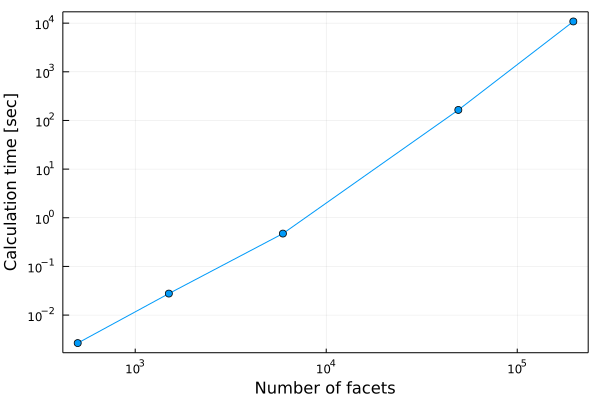

In [168]:
plot(framestyle=:box, legend=false)


Ns = [500,      1500,     5932,     49152,      196608]    # 786432,     3145728
ts = [0.002659, 0.027669, 0.473278, 164.478600, 10829.774176]    # 3600*24*10, 3600*24*1000
plot!(Ns, ts, marker=(:circle))

plot!(xticks=[10^3, 10^4, 10^5])
plot!(xlabel="Number of facets")
plot!(ylabel="Calculation time [sec]")
plot!(xaxis=:log, yaxis=:log)

In [172]:
# using FileIO, MeshIO
# mesh = load(shapepath)

In [18]:
# using VTKView

In [20]:
# using VTKDataTypes
# using VTKDataIO

In [1]:
using VTKDataTypes
using WriteVTK
using PyCall
using LightXML
# using Iterators

@pyimport vtk.util.numpy_support as vtkns
@pyimport vtk as vtk
@pyimport numpy as np

In [13]:
# include("/Users/masanorikanamaru/Documents/GitHub/VTKDataIO.jl/src/vtkreaders.jl")

In [14]:
# read_vtk(vtkname)

In [15]:
# read_static_vtk